In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

Credit to most of the code goes to Professor Grimmelmann

# 2 Features

In [2]:
# Generating a triangle with interior angles of 27, 63, and 90 using 2 features.
npts = 10000

X2 = np.zeros((npts,2))
y2 = np.zeros(npts)
height = np.sin(np.deg2rad(27))
width = np.sin(np.deg2rad(63))
diagonal = np.sqrt(height ** 2 + width **2)


for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0)
    X2[i,1] = np.random.uniform(0.0,2.0)
    
    if X2[i,0] >= 0.25 and X2[i,1] >= 0.25 and X2[i,1] <= 1.5 and X2[i,1] / X2[i,0] >= diagonal:
        y2[i] = 1
    else:
        y2[i] = 0

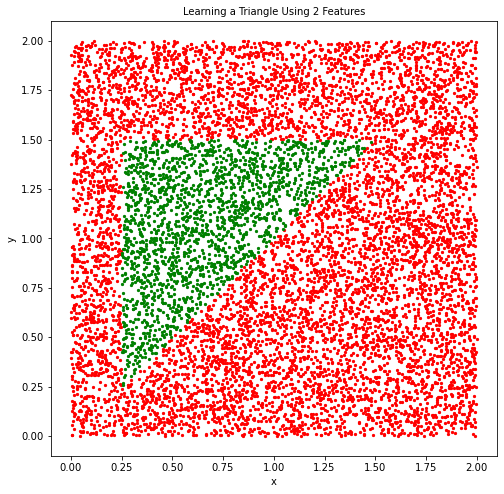

In [3]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Triangle Using 2 Features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [4]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)

In [5]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X2_train, y2_train)

    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #print(z)
    dp = tree.decision_path(X2_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.1966 0.19679999999999997
2 0.1966 0.19679999999999997
3 0.11280000000000001 0.10799999999999998
4 0.06320000000000003 0.06040000000000001
5 0.06299999999999994 0.06140000000000001
6 0.021199999999999997 0.030399999999999983
7 0.01739999999999997 0.021399999999999975
8 0.006800000000000028 0.01419999999999999
9 0.0041999999999999815 0.012199999999999989
10 0.0008000000000000229 0.010199999999999987


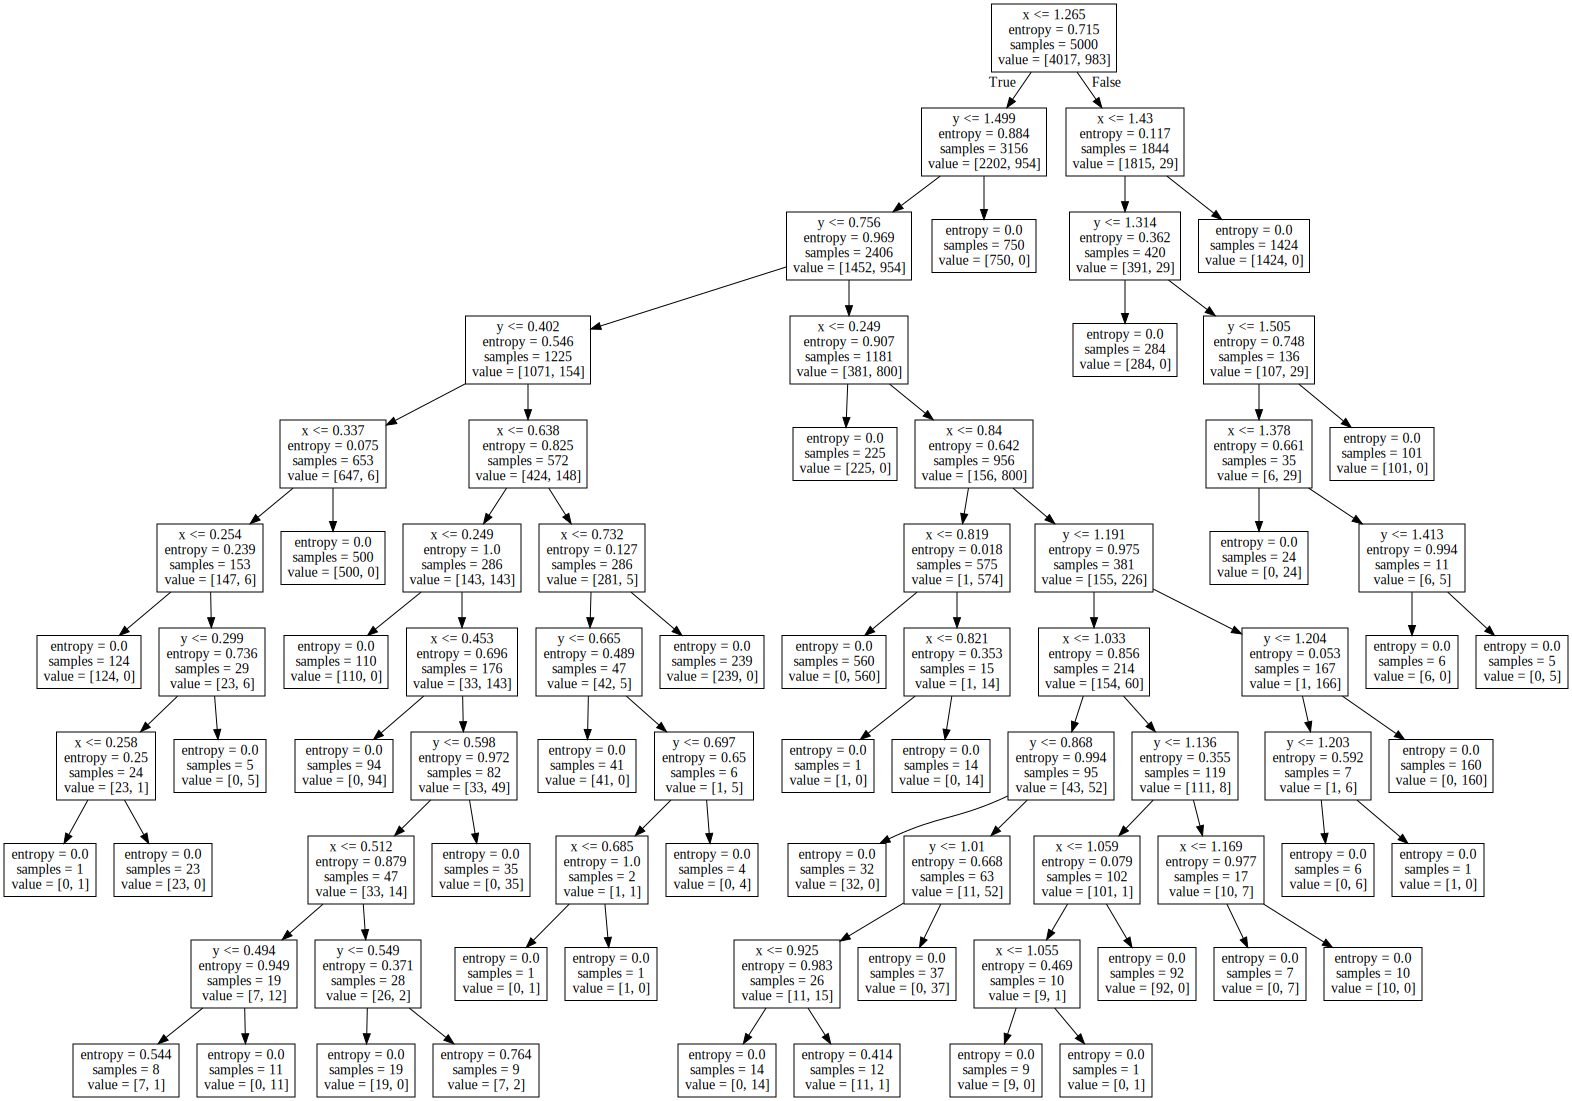

In [6]:
# plot the final decision tree
export_graphviz(tree, out_file='T2.dot', feature_names=['x','y'])
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

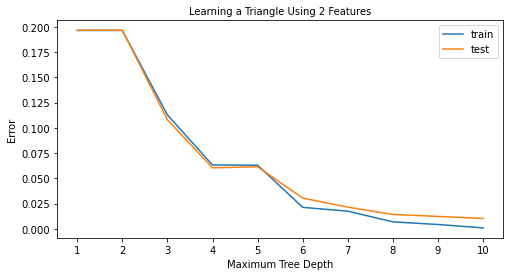

In [7]:
# plot errors by tree depth    
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Triangle Using 2 Features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


# 4 Features

In [8]:
# Generating a triangle with interior angles of 27, 63, and 90 using 4 features.
npts = 10000

X4 = np.zeros((npts,4))
y4 = np.zeros(npts)
height = np.sin(np.deg2rad(27))
width = np.sin(np.deg2rad(63))
diagonal = np.sqrt(height ** 2 + width **2)


for i in range(0,npts): 
    X4[i,0] = np.random.uniform(0.0,2.0)
    X4[i,1] = np.random.uniform(0.0,2.0)
    X4[i,2] = X4[i,0] + X4[i,1]
    X4[i,3] = X4[i,0] - X4[i,1]
    
    if X4[i,0] >= 0.25 and X4[i,1] >= 0.25 and X4[i,1] <= 1.5 and X4[i,1] / X4[i,0] >= diagonal:
        y4[i] = 1
    else:
        y4[i] = 0

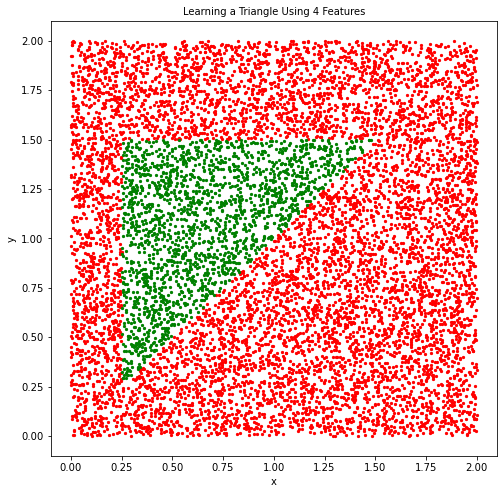

In [9]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Triangle Using 4 Features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X4[y4==0, 0], y = X4[y4==0, 1], color='red', label='0', s=5)
plt.scatter(x = X4[y4==1, 0], y = X4[y4==1, 1], color='green', label='1', s=5)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [10]:
# split data into 50% training and 50% test data

X4_train, X4_test, y4_train, y4_test = train_test_split(
         X4, y4, test_size=0.50, random_state=0)

In [11]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X4_train, y4_train)

    X4_combined = np.vstack((X4_train, X4_test))
    y4_combined = np.hstack((y4_train, y4_test))

    # optional outputs
    z = tree.apply(X4_combined)
    #print(z)
    dp = tree.decision_path(X4_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X4_train,y4_train)
    Errors[i,1] = 1 - tree.score(X4_test,y4_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.19320000000000004 0.19720000000000004
2 0.09019999999999995 0.09199999999999997
3 0.0 0.0018000000000000238
4 0.0 0.0018000000000000238
5 0.0 0.0018000000000000238
6 0.0 0.0018000000000000238
7 0.0 0.0018000000000000238
8 0.0 0.0018000000000000238
9 0.0 0.0018000000000000238
10 0.0 0.0018000000000000238


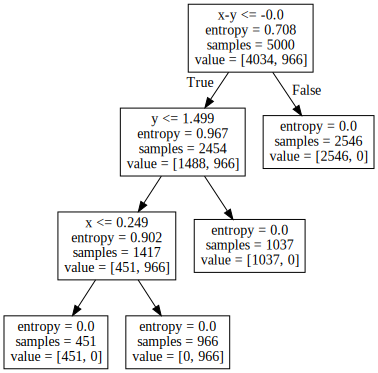

In [12]:
# plot the final decision tree
export_graphviz(tree, out_file='T4.dot', feature_names=['x','y','x+y','x-y'])
with open('T4.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

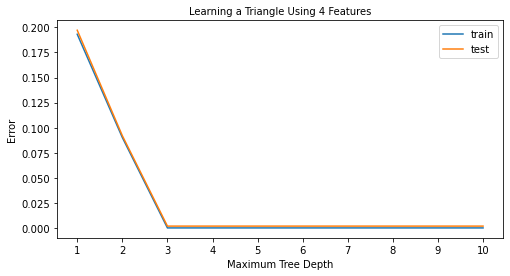

In [13]:
# plot errors by tree depth    
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Triangle Using 4 Features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


# 6 Features

In [14]:
# Generating a triangle with interior angles of 27, 63, and 90 using 6 features.
npts = 10000

X6 = np.zeros((npts,6))
y6 = np.zeros(npts)
height = np.sin(np.deg2rad(27))
width = np.sin(np.deg2rad(63))
diagonal = np.sqrt(height ** 2 + width **2)


for i in range(0,npts): 
    X6[i,0] = np.random.uniform(0.0,2.0)
    X6[i,1] = np.random.uniform(0.0,2.0)
    X6[i,2] = X6[i,0] + X6[i,1]
    X6[i,3] = X6[i,0] - X6[i,1]
    X6[i,4] = (2*X6[i,0]) + X6[i,1]
    X6[i,5] = X6[i,0] + (2*X6[i,1])
    
    if X6[i,0] >= 0.25 and X6[i,1] >= 0.25 and X6[i,1] <= 1.5 and X6[i,1] / X6[i,0] >= diagonal:
        y6[i] = 1
    else:
        y6[i] = 0

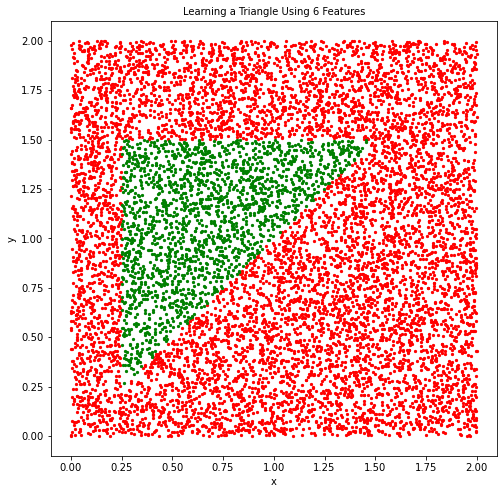

In [15]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Triangle Using 6 Features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X6[y6==0, 0], y = X6[y6==0, 1], color='red', label='0', s=5)
plt.scatter(x = X6[y6==1, 0], y = X6[y6==1, 1], color='green', label='1', s=5)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [16]:
# split data into 50% training and 50% test data

X6_train, X6_test, y6_train, y6_test = train_test_split(
         X6, y6, test_size=0.50, random_state=0)

In [17]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X6_train, y6_train)

    X6_combined = np.vstack((X6_train, X6_test))
    y6_combined = np.hstack((y6_train, y6_test))

    # optional outputs
    z = tree.apply(X6_combined)
    #print(z)
    dp = tree.decision_path(X6_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X6_train,y6_train)
    Errors[i,1] = 1 - tree.score(X6_test,y6_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.19120000000000004 0.19899999999999995
2 0.08979999999999999 0.08099999999999996
3 0.0 0.00019999999999997797
4 0.0 0.00019999999999997797
5 0.0 0.00019999999999997797
6 0.0 0.00019999999999997797
7 0.0 0.00019999999999997797
8 0.0 0.00019999999999997797
9 0.0 0.00019999999999997797
10 0.0 0.00019999999999997797


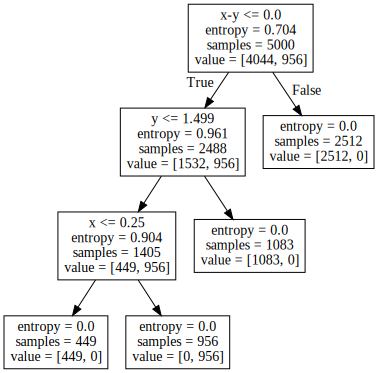

In [18]:
# plot the final decision tree
export_graphviz(tree, out_file='T6.dot', feature_names=['x','y','x+y','x-y','2x+y','x+2y'])
with open('T6.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

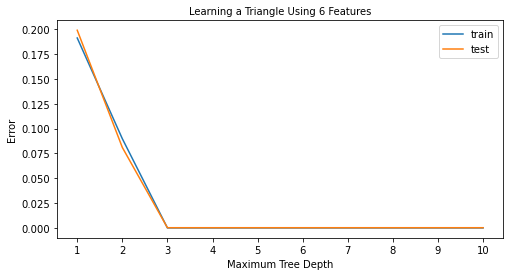

In [19]:
# plot errors by tree depth    
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Triangle Using 6 Features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


# 8 Features

In [20]:
# Generating a triangle with interior angles of 27, 63, and 90 using 8 features.
npts = 10000

X8 = np.zeros((npts,8))
y8 = np.zeros(npts)
height = np.sin(np.deg2rad(27))
width = np.sin(np.deg2rad(63))
diagonal = np.sqrt(height ** 2 + width **2)


for i in range(0,npts): 
    X8[i,0] = np.random.uniform(0.0,2.0)
    X8[i,1] = np.random.uniform(0.0,2.0)
    X8[i,2] = X8[i,0] + X8[i,1]
    X8[i,3] = X8[i,0] - X8[i,1]
    X8[i,4] = (2*X8[i,0]) + X8[i,1]
    X8[i,5] = X8[i,0] + (2*X8[i,1])
    X8[i,6] = X8[i,0] * X8[i,1]
    X8[i,7] = 2 * (X8[i,0] * X8[i,1])
    
    if X8[i,0] >= 0.25 and X8[i,1] >= 0.25 and X8[i,1] <= 1.5 and X8[i,1] / X8[i,0] >= diagonal:
        y8[i] = 1
    else:
        y8[i] = 0

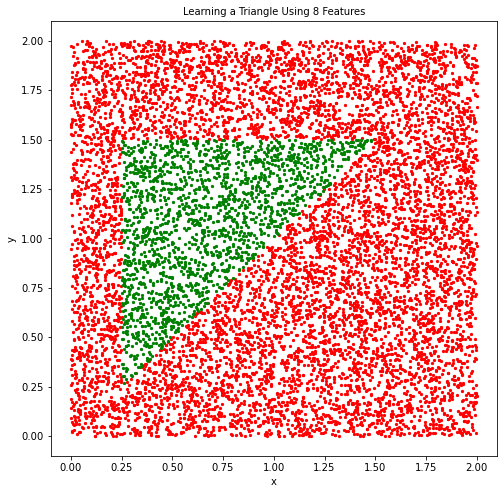

In [21]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Triangle Using 8 Features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X8[y8==0, 0], y = X8[y8==0, 1], color='red', label='0', s=5)
plt.scatter(x = X8[y8==1, 0], y = X8[y8==1, 1], color='green', label='1', s=5)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [22]:
# split data into 50% training and 50% test data

X8_train, X8_test, y8_train, y8_test = train_test_split(
         X8, y8, test_size=0.50, random_state=0)

In [23]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X8_train, y8_train)

    X8_combined = np.vstack((X8_train, X8_test))
    y8_combined = np.hstack((y8_train, y8_test))

    # optional outputs
    z = tree.apply(X8_combined)
    #print(z)
    dp = tree.decision_path(X8_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X8_train,y8_train)
    Errors[i,1] = 1 - tree.score(X8_test,y8_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.18200000000000005 0.19279999999999997
2 0.0796 0.09079999999999999
3 0.0 0.00019999999999997797
4 0.0 0.00019999999999997797
5 0.0 0.00019999999999997797
6 0.0 0.00019999999999997797
7 0.0 0.00019999999999997797
8 0.0 0.00019999999999997797
9 0.0 0.00019999999999997797
10 0.0 0.00019999999999997797


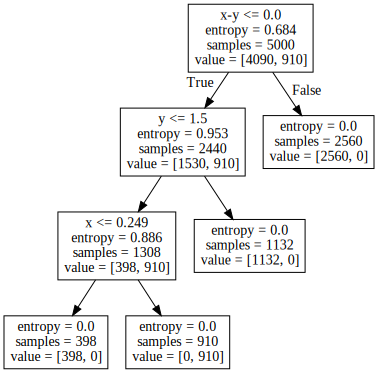

In [24]:
# plot the final decision tree
export_graphviz(tree, out_file='T8.dot', feature_names=['x','y','x+y','x-y','2x+y','x+2y','XY','2XY'])
with open('T8.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

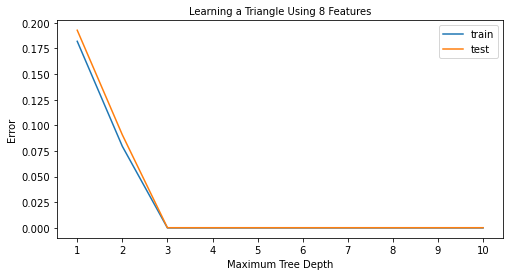

In [25]:
# plot errors by tree depth    
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Triangle Using 8 Features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


# Results/Discussion

Based on the results, the accuracy varies depending on the number of features. For the triangle using two features, we can see that the errors were much larger compared to the other triangles using more features. This is also shown by the error plots, as using two features gave us a low accuracy. The decision tree had to also split multiple times when using two features due to this low accuracy. One thing to note is that after using four features, the decision tree depth never decreased but we were getting very little error with good accuracy. This may be because my features were not significant enough to improve the accuracy anymore or it could be that this may be the best we can really get.